In [12]:
import glob
from visualisations_utils import *

## In the cell below, you choose the input path, and the magnifications that you wish to visualise.
Because of the way the data is structured, it only makes sense to combine the following attributes:
- Input data:
    - "F" = field of view
    - "Z" = 3D z-number  (slice number or vertical position)
- Target data:
    - "F" = field of view
    - "A" = action list number (3 fluorescent + 1 brightfield action)

In [13]:
dataset_samples = glob.glob(os.path.join("valid", "*/*/Assay*"))
input_paths, target_paths = get_sample_paths(dataset_samples, ["60x", "40x", "20x"])
filtered_paths = filter_paths(target_paths, "A")

In [15]:
stats_dict = get_stats(filtered_paths)

60x
40x
20x


## Visualising the plots from different angles:

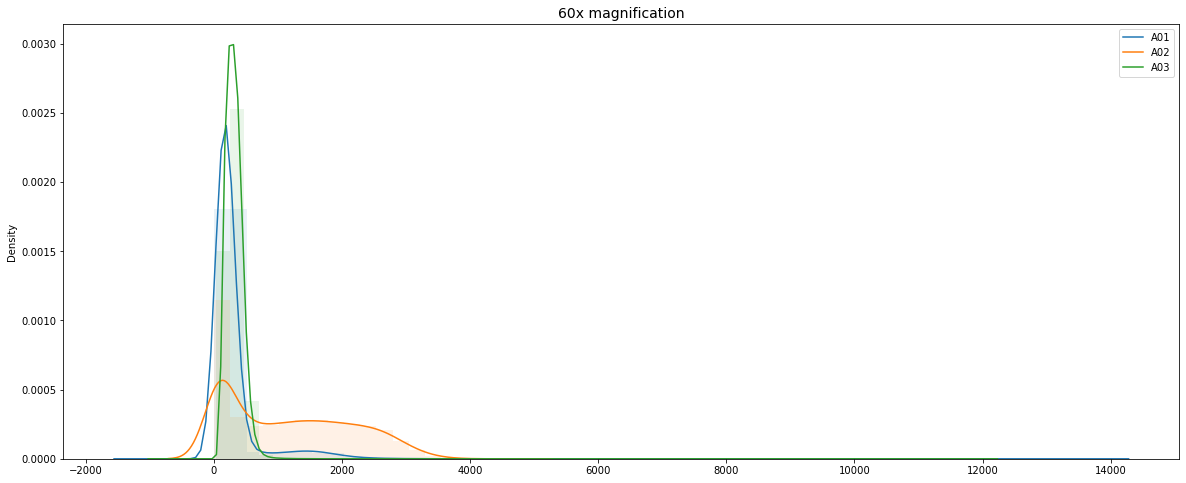

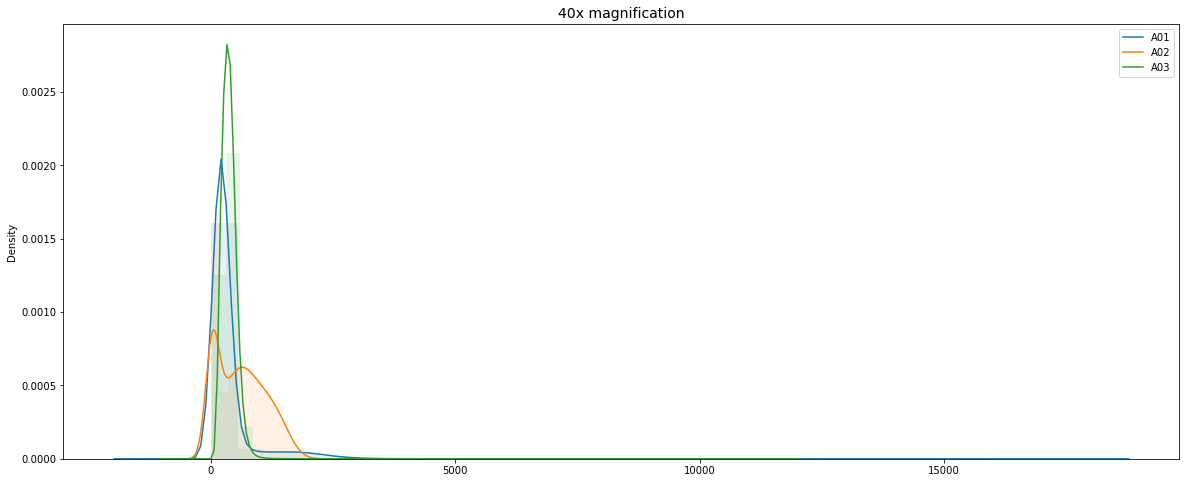

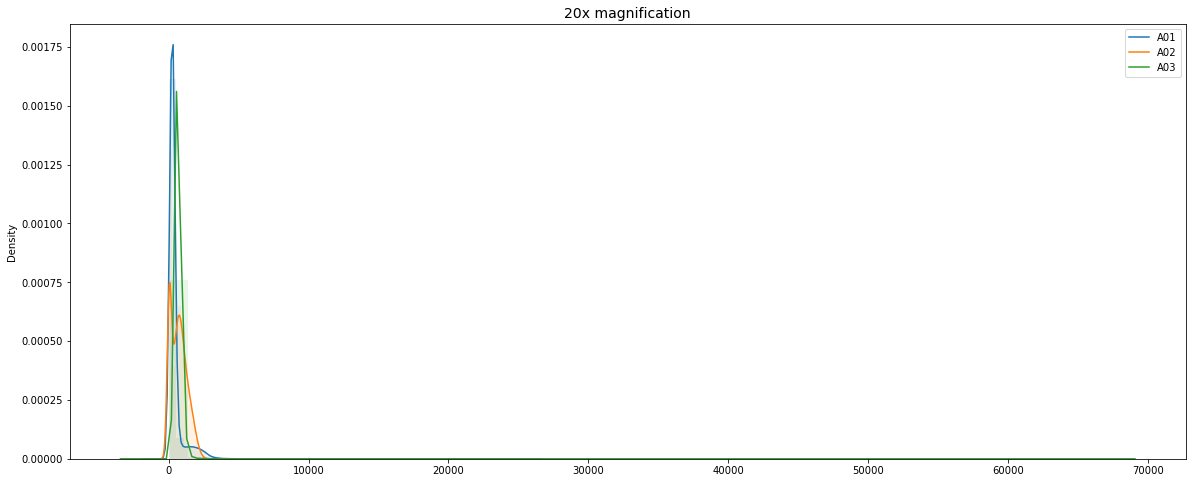

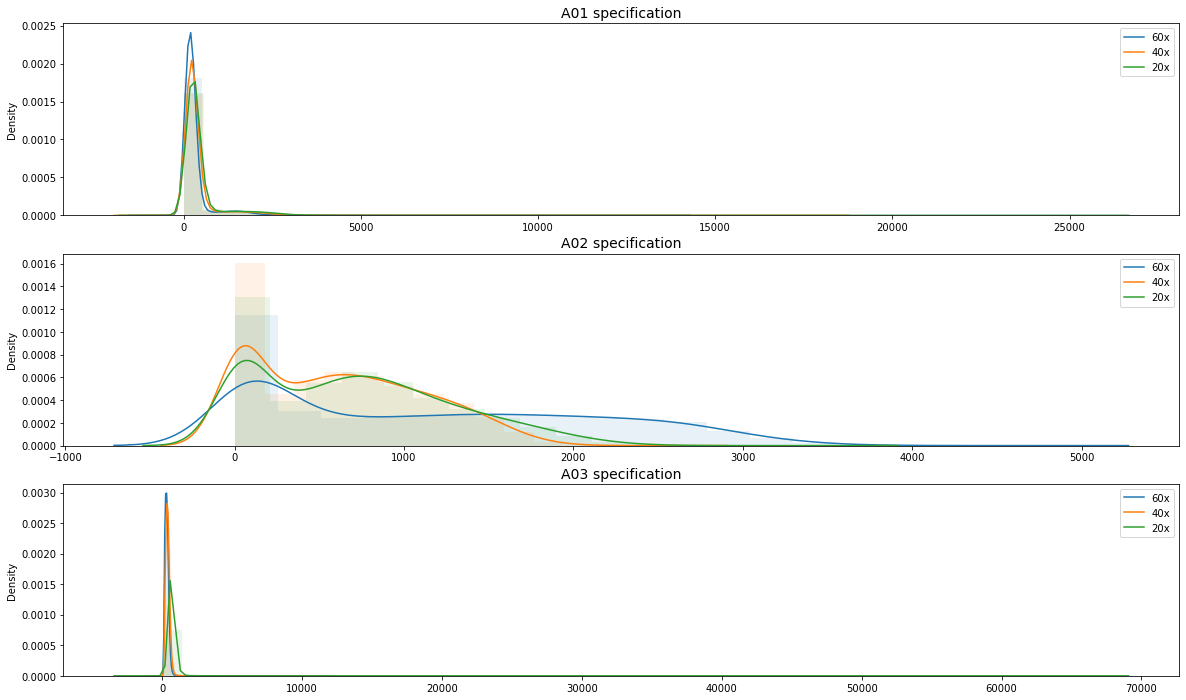

In [16]:
visualise_stats(stats_dict)
